# CASE STUDY :
Problem 
Our global leadership needs to understand how RS sales in India have trended since fiscal year 2016
Company wants to identify potential customer and customers need to pay more attention. 
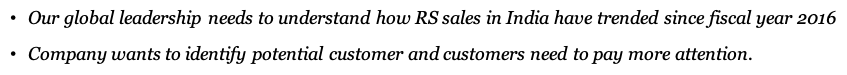

# I. LOADING  & CLEANING  DATASET

In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [492]:
df = pd.read_excel('data.xlsx')

In [493]:
df.head()

,Business Line Code,Business Line Description,Discount,Fiscal Date,Fiscal Month Name,Fiscal Period,Fiscal Year,FY 2018 Rev,Item Category,Item Name,Item #,Ship To Customer Name,Ult Dest Country,Units,Revenue
0,RS,Reference Standards,0,2015-07-01,JULY,1,2016,nan,SYSTEM SUITABILITY,"1,4-Benzoquinone",1056504,Alexandria Real Estate Equities,INDIA,4,731
1,RS,Reference Standards,32,2015-07-01,JULY,1,2016,nan,SYSTEM SUITABILITY,"1,4-Benzoquinone",1056504,Alexandria Real Estate Equities,INDIA,1,183
2,RS,Reference Standards,0,2015-07-01,JULY,1,2016,nan,SYSTEM SUITABILITY,"1,4-Benzoquinone",1056504,Alexandria Real Estate Equities,INDIA,0,0
3,RS,Reference Standards,0,2015-07-01,JULY,1,2016,nan,RESIDUAL SOLVENT,1-Butanol,1081807,Alexandria Real Estate Equities,INDIA,2,366
4,RS,Reference Standards,0,2015-07-01,JULY,1,2016,nan,RESIDUAL SOLVENT,2-Propanol,1570428,Alexandria Real Estate Equities,INDIA,3,548


In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117825 entries, 0 to 117824
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Business Line Code         117825 non-null  object        
 1   Business Line Description  117825 non-null  object        
 2   Discount                   117825 non-null  float64       
 3   Fiscal Date                117825 non-null  datetime64[ns]
 4   Fiscal Month Name          117825 non-null  object        
 5   Fiscal Period              117823 non-null  float64       
 6   Fiscal Year                117823 non-null  float64       
 7   FY 2018 Rev                33616 non-null   float64       
 8   Item Category              117825 non-null  object        
 9   Item Name                  117798 non-null  object        
 10  Item #                     117825 non-null  object        
 11  Ship To Customer Name      117824 non-null  object  

In [495]:
df.shape

(117825, 15)

In [496]:
df.drop(['Item #','FY 2018 Rev','Business Line Description','Ult Dest Country','Business Line Code'],axis=1,inplace=True)


In [497]:
df.head()

,Discount,Fiscal Date,Fiscal Month Name,Fiscal Period,Fiscal Year,Item Category,Item Name,Ship To Customer Name,Units,Revenue
0,0,2015-07-01,JULY,1,2016,SYSTEM SUITABILITY,"1,4-Benzoquinone",Alexandria Real Estate Equities,4,731
1,32,2015-07-01,JULY,1,2016,SYSTEM SUITABILITY,"1,4-Benzoquinone",Alexandria Real Estate Equities,1,183
2,0,2015-07-01,JULY,1,2016,SYSTEM SUITABILITY,"1,4-Benzoquinone",Alexandria Real Estate Equities,0,0
3,0,2015-07-01,JULY,1,2016,RESIDUAL SOLVENT,1-Butanol,Alexandria Real Estate Equities,2,366
4,0,2015-07-01,JULY,1,2016,RESIDUAL SOLVENT,2-Propanol,Alexandria Real Estate Equities,3,548


In [498]:
# Assuming negative units and units=0 are either returned or canceled units, we filter data set as following
df=df[df['Units'] > 0]
df.head()

,Discount,Fiscal Date,Fiscal Month Name,Fiscal Period,Fiscal Year,Item Category,Item Name,Ship To Customer Name,Units,Revenue
0,0,2015-07-01,JULY,1,2016,SYSTEM SUITABILITY,"1,4-Benzoquinone",Alexandria Real Estate Equities,4,731
1,32,2015-07-01,JULY,1,2016,SYSTEM SUITABILITY,"1,4-Benzoquinone",Alexandria Real Estate Equities,1,183
3,0,2015-07-01,JULY,1,2016,RESIDUAL SOLVENT,1-Butanol,Alexandria Real Estate Equities,2,366
4,0,2015-07-01,JULY,1,2016,RESIDUAL SOLVENT,2-Propanol,Alexandria Real Estate Equities,3,548
5,64,2015-07-01,JULY,1,2016,RESIDUAL SOLVENT,2-Propanol,Alexandria Real Estate Equities,2,366


In [499]:
#Rename Some Columns
df.rename(columns= {'Item Category':'Category','Ship To Customer Name':'Customer',"Fiscal Month Name":"Fiscal Month"},inplace=True)

In [500]:
df.isnull().sum()

Discount          0
Fiscal Date       0
Fiscal Month      0
Fiscal Period     2
Fiscal Year       2
Category          0
Item Name        26
Customer          1
Units             0
Revenue           0
dtype: int64

In [501]:
df.dropna(inplace=True)
df.isnull().sum()

Discount         0
Fiscal Date      0
Fiscal Month     0
Fiscal Period    0
Fiscal Year      0
Category         0
Item Name        0
Customer         0
Units            0
Revenue          0
dtype: int64

# II. EDA:

In [502]:
# Overview:
start_period=df['Fiscal Date'].dt.date.min()
end_period=df['Fiscal Date'].dt.date.max()
total_quality=df['Units'].sum()
total_revenue=df['Revenue'].sum()
total_customer = df['Customer'].nunique()
print(f"The Sales Period: {start_period}  to  {end_period}" )
print(f'The Total Units Sold: {total_quality}')
print(f'The Total Revenue: {total_revenue}')
print(f'Total Customer over Period: {total_customer}')

The Sales Period: 2015-07-01  to  2018-03-30
The Total Units Sold: 256676
The Total Revenue: 99182865.47
Total Customer over Period: 319


In [503]:
# Analyse Customer to see how loyal customer is, how often they do business with USP and Purchase Amount over years.
customer = df.groupby('Customer').agg({'Fiscal Date':    lambda x : (x.max()-x.min()).days,
                                       'Item Name'  :    lambda x : len(x),
                                       'Revenue':        lambda x : sum(x)})
#Create data frame customer with columns:
customer.columns= ['Recency','Frequency','Monetary']
customer.sort_values('Recency', ascending = False)

,Recency,Frequency,Monetary
Customer,,,
Advanced Micro Devices Inc,999,2777,1926639
Akamai Technologies Inc,996,501,303306
Alliant Energy Corp,984,432,658530
Allegion,980,145,234074
Coty Inc,978,14,9257
...,...,...,...
Fortune Brands Home & Security,0,1,259
Fox Corporation (Class B),0,3,955
Franklin Resources,0,1,273


In [504]:
# Fiscal year 2016
df2016=df[df['Fiscal Year'] == 2016.0]
df2016.head()

,Discount,Fiscal Date,Fiscal Month,Fiscal Period,Fiscal Year,Category,Item Name,Customer,Units,Revenue
0,0,2015-07-01,JULY,1,2016,SYSTEM SUITABILITY,"1,4-Benzoquinone",Alexandria Real Estate Equities,4,731
1,32,2015-07-01,JULY,1,2016,SYSTEM SUITABILITY,"1,4-Benzoquinone",Alexandria Real Estate Equities,1,183
3,0,2015-07-01,JULY,1,2016,RESIDUAL SOLVENT,1-Butanol,Alexandria Real Estate Equities,2,366
4,0,2015-07-01,JULY,1,2016,RESIDUAL SOLVENT,2-Propanol,Alexandria Real Estate Equities,3,548
5,64,2015-07-01,JULY,1,2016,RESIDUAL SOLVENT,2-Propanol,Alexandria Real Estate Equities,2,366


In [505]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38267 entries, 0 to 40582
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Discount       38267 non-null  float64       
 1   Fiscal Date    38267 non-null  datetime64[ns]
 2   Fiscal Month   38267 non-null  object        
 3   Fiscal Period  38267 non-null  float64       
 4   Fiscal Year    38267 non-null  float64       
 5   Category       38267 non-null  object        
 6   Item Name      38267 non-null  object        
 7   Customer       38267 non-null  object        
 8   Units          38267 non-null  int64         
 9   Revenue        38267 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 3.2+ MB


In [506]:
#Fiscal Year 2017:
df2017=df[df['Fiscal Year']==2017.0]
df2017.head()

,Discount,Fiscal Date,Fiscal Month,Fiscal Period,Fiscal Year,Category,Item Name,Customer,Units,Revenue
40583,0,2016-07-01,JULY,1,2017,EXCIPIENTS,2-tert-Butyl-4-hydroxyanisole,Advanced Micro Devices Inc,1,222
40584,0,2016-07-01,JULY,1,2017,EXCIPIENTS,3-tert-Butyl-4-hydroxyanisole,Advanced Micro Devices Inc,1,222
40585,0,2016-07-01,JULY,1,2017,EXCIPIENTS,Aspartame,Advanced Micro Devices Inc,1,222
40586,0,2016-07-01,JULY,1,2017,IMPURITIES,"Aspartame Related Compound A (5-Benzyl-3,6-di...",Advanced Micro Devices Inc,1,692
40587,0,2016-07-01,JULY,1,2017,IMPURITIES,"Atorvastatin Related Compound E (3S, 5S enant...",Advanced Micro Devices Inc,4,2768


In [507]:
#Fiscal Year 2018:
df2018=df[df['Fiscal Year']==2018.0]
df2018.head()

,Discount,Fiscal Date,Fiscal Month,Fiscal Period,Fiscal Year,Category,Item Name,Customer,Units,Revenue
84209,0,2017-07-03,JULY,1,2018,SMALL MOLECULES,Abiraterone Acetate,ABIOMED Inc,1,910
84210,0,2017-07-03,JULY,1,2018,SMALL MOLECULES,Acetazolamide,ABIOMED Inc,1,230
84211,0,2017-07-03,JULY,1,2018,IMPURITIES,"Adrenalone Hydrochloride (3',4'-Dihydroxy-2-(...",ABIOMED Inc,2,1460
84212,0,2017-07-03,JULY,1,2018,IMPURITIES,Benzophenone (Diphenylmethanone),ABIOMED Inc,1,730
84213,0,2017-07-03,JULY,1,2018,SMALL MOLECULES,Dopamine Hydrochloride,ABIOMED Inc,1,230


/Users/NDL/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/NDL/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/NDL/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

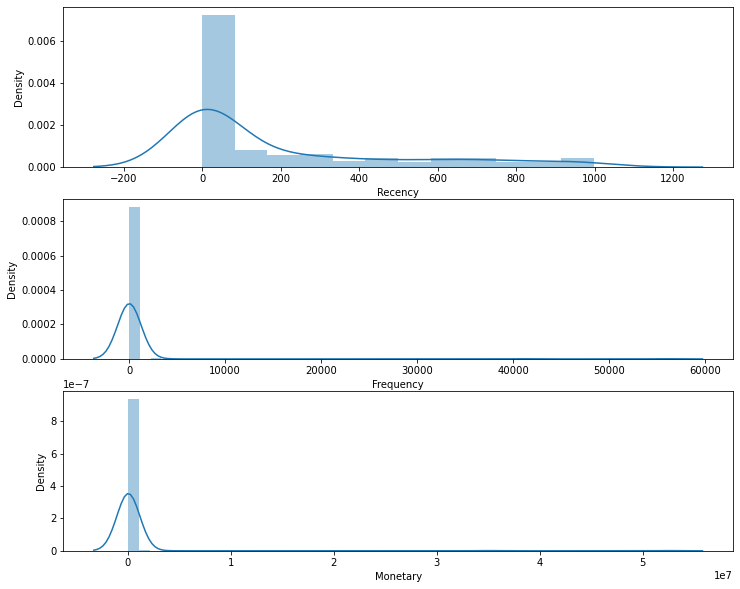

In [508]:
# Create RFM Distribution plot

fig, axes= plt.subplots(3,1,figsize=(12,10))

sns.distplot(customer['Recency'],ax=axes[0])

sns.distplot(customer['Frequency'],ax=axes[1])

sns.distplot(customer['Monetary'],ax=axes[2])

plt.show()

In [509]:
print(customer['Frequency'].describe())
print(customer['Recency'].describe())
print(customer['Monetary'].describe())

count     319
mean      343
std      3883
min         1
25%         1
50%         3
75%         9
max     56030
Name: Frequency, dtype: float64
count   319
mean    193
std     292
min       0
25%       0
50%       0
75%     309
max     999
Name: Recency, dtype: float64
count        319
mean      310918
std      3518079
min          196
25%          662
50%         1597
75%         7473
max     52486605
Name: Monetary, dtype: float64


In [510]:
# Split the metric into segments as quartiles:
quantiles = customer.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 0.0, 0.5: 0.0, 0.75: 309.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 9.0},
 'Monetary': {0.25: 662.5, 0.5: 1597.0, 0.75: 7473.0}}

# III. Analyse the RFM and Label Top Tier Customer

RFM : The lower recency, highest frequency and monetary amount are our best customer. However, that should be good if in short period of time. In this dataset we look at the aspect of the most recent customer with high frequency and high monetary value

In [511]:
# Create a copy of customer data to perform segment rfm
segmented_rfm=customer
segmented_rfm.head()

,Recency,Frequency,Monetary
Customer,,,
A.O. Smith Corp,661,56030,52486605
ABIOMED Inc,942,491,367740
AES Corp,786,270,186809
AFLAC Inc,945,194,132754
AMETEK Inc.,764,55,45102


In [512]:
# Assign Recency Score and Frequency & Monetary Score:
def RFMscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1


In [513]:
# Add segment numbers to the rfm table:
segmented_rfm['R']=segmented_rfm['Recency'].apply(RFMscore,args=('Recency',quantiles,))
segmented_rfm['F']=segmented_rfm['Frequency'].apply(RFMscore,args=('Frequency',quantiles,))
segmented_rfm['M']=segmented_rfm['Monetary'].apply(RFMscore,args=('Monetary',quantiles,))
segmented_rfm.head()

,Recency,Frequency,Monetary,R,F,M
Customer,,,,,,
A.O. Smith Corp,661,56030,52486605,1,1,1
ABIOMED Inc,942,491,367740,1,1,1
AES Corp,786,270,186809,1,1,1
AFLAC Inc,945,194,132754,1,1,1
AMETEK Inc.,764,55,45102,1,1,1


In [514]:
# Create RFM Score column base onf r,f,m quartile:
segmented_rfm['RFMSegment']=(segmented_rfm['R'].map(str) + 
                      segmented_rfm['F'].map(str) +
                      segmented_rfm['M'].map(str))
segmented_rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFMSegment
Customer,,,,,,,
A.O. Smith Corp,661,56030,52486605,1,1,1,111
ABIOMED Inc,942,491,367740,1,1,1,111
AES Corp,786,270,186809,1,1,1,111
AFLAC Inc,945,194,132754,1,1,1,111
AMETEK Inc.,764,55,45102,1,1,1,111


In [515]:
# Print out top best customer base on RFMScore:
segmented_rfm[segmented_rfm['RFMSegment']=='111'].sort_values('Monetary',ascending= True)

,Recency,Frequency,Monetary,R,F,M,RFMSegment
Customer,,,,,,,
Ameren Corp,607,16,7488,1,1,1,111
Fifth Third Bancorp,323,11,8090,1,1,1,111
Aptiv PLC,636,26,9112,1,1,1,111
Coty Inc,978,14,9257,1,1,1,111
CBRE Group,978,21,9417,1,1,1,111
Delta Air Lines Inc.,741,13,9912,1,1,1,111
Cadence Design Systems,485,14,10057,1,1,1,111
AT&T Inc.,673,23,10898,1,1,1,111
Brown-Forman Corp.,452,23,13133,1,1,1,111


In [516]:
# Label customer base on the sum of R,F,M Score:
segmented_rfm['RFMScore']=segmented_rfm['R'] + segmented_rfm['F'] +segmented_rfm['M']
segmented_rfm['RFMScore'].describe()

count   319
mean      8
std       3
min       3
25%       5
50%       8
75%      11
max      12
Name: RFMScore, dtype: float64

In [517]:
# Base on the score we label customer as : Platinum, Gold, Silver and Bronze
segmented_rfm["Customer_Tier"]=pd.cut(segmented_rfm["RFMScore"],bins=[-1,4,6,9,13],labels=['Platinum','Gold','Silver','Bronze'])
segmented_rfm


,Recency,Frequency,Monetary,R,F,M,RFMSegment,RFMScore,Customer_Tier
Customer,,,,,,,,,
A.O. Smith Corp,661,56030,52486605,1,1,1,111,3,Platinum
ABIOMED Inc,942,491,367740,1,1,1,111,3,Platinum
AES Corp,786,270,186809,1,1,1,111,3,Platinum
AFLAC Inc,945,194,132754,1,1,1,111,3,Platinum
AMETEK Inc.,764,55,45102,1,1,1,111,3,Platinum
...,...,...,...,...,...,...,...,...,...
Newmont Corporation,0,1,310,4,4,4,444,12,Bronze
News Corp. Class A,0,2,2023,4,3,2,432,9,Silver
News Corp. Class B,0,1,1595,4,4,3,443,11,Bronze


In [518]:
sizes= segmented_rfm['Customer_Tier'].value_counts()
sizes

Bronze      123
Silver       78
Platinum     76
Gold         42
Name: Customer_Tier, dtype: int64

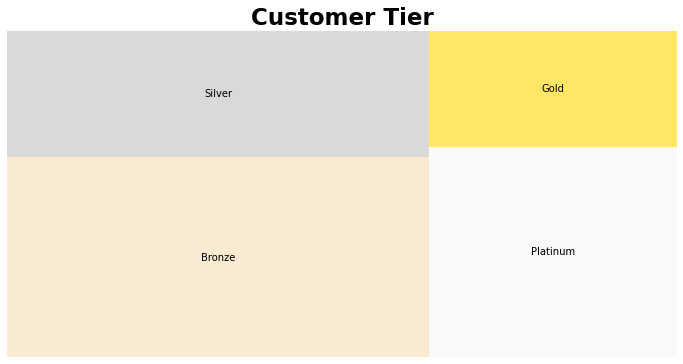

In [519]:
# Plot the Customer tier
import squarify

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 6)
squarify.plot(label=sizes.index, alpha=.6,sizes=sizes,color=["wheat","silver","whitesmoke", "gold"])
plt.title("Customer Tier",fontsize=23,fontweight="bold")
plt.axis('off')
plt.show()

# IV. Analysis Customer Lifetime Value

## Formula:
$$ CLTV = \frac{Average Order Value * Purchase Frequency} {Churn Rate} \ * Profit Margin $$

In [520]:
# For Fiscal Year 2016

customer2017 = df2017.groupby('Customer').agg({'Fiscal Date':    lambda x : (x.max()-x.min()).days,

                                               'Item Name'  :    lambda x : len(x),

                                               'Revenue'    :    lambda x : sum(x)})

customer2017.columns= ['Recency','Frequency','Monetary']

customer2017.sort_values('Recency', ascending = False)


,Recency,Frequency,Monetary
Customer,,,
Akamai Technologies Inc,357,123,74506
Alliant Energy Corp,354,158,216504
Allstate Corp,342,458,263726
Advanced Micro Devices Inc,341,1105,766728
American Tower Corp.,336,205,241062
...,...,...,...
Cummins Inc.,0,11,5805
Costco Wholesale Corp.,0,2,444
Copart Inc,0,6,2742


In [521]:
# Average Order Value: 
customer2017['AvgOrderValue'] =customer2017['Monetary']/customer2017['Frequency']
customer2017['AvgOrderValue']

Customer
A.O. Smith Corp                932
ABIOMED Inc                    871
AES Corp                       731
AFLAC Inc                      609
AMETEK Inc.                    491
                              ... 
Motorola Solutions Inc.        351
Nasdaq Inc.                   1028
National Oilwell Varco Inc.    638
News Corp. Class B            1595
NextEra Energy                 729
Name: AvgOrderValue, Length: 161, dtype: float64

In [522]:
#Purchase Frequency:
PurchaseFrequency=sum(customer2017['Frequency'])/161
PurchaseFrequency

248.07453416149067

In [523]:
# Churn Rate: ration between customers who not order against to total of customers
churnrate=sum(customer2017['Recency']==0)/161
churnrate
#AS we can see there is more than 50% customer did not order again in Fiscal year of 2016

0.5590062111801242

In [524]:
# Assuming the profit magin is 40%
customer2017['ProfitMargin']=customer2017['Monetary'] * 0.4
customer2017.head()

,Recency,Frequency,Monetary,AvgOrderValue,ProfitMargin
Customer,,,,,
A.O. Smith Corp,284,28141,26240017,932,10496007
ABIOMED Inc,324,199,173390,871,69356
AES Corp,208,102,74527,731,29811
AFLAC Inc,316,82,49943,609,19977
AMETEK Inc.,272,11,5399,491,2160


In [552]:
# Caculate Customer Life Time Value:
pd.set_option('display.float_format','{:.0f}'.format)
customer2017['CLTV'] =((customer2017['AvgOrderValue']*PurchaseFrequency)/churnrate)*customer2017['ProfitMargin']
customer2017.sort_values('CLTV',ascending=False).head(10)


,Recency,Frequency,Monetary,AvgOrderValue,ProfitMargin,CLTV
Customer,,,,,,
A.O. Smith Corp,284,28141,26240017,932,10496007,4343244285705
Alexandria Real Estate Equities,220,6792,5848153,861,2339261,893851339336
Alphabet Inc. (Class C),330,518,726273,1402,290509,180757413810
Dish Network,8,3,50064,16688,20026,148303377509
AmerisourceBergen Corp,198,102,260012,2549,104005,117655025991
Advance Auto Parts,334,381,488645,1283,195458,111246789208
Advanced Micro Devices Inc,341,1105,766728,694,306691,94437909415
Alaska Air Group Inc,302,90,217753,2419,87101,93521470529
Broadridge Financial Solutions,269,35,109565,3130,43826,60883442747


In [553]:
df2017['Month_Year'] = pd.to_datetime(df2017['Fiscal Date']).dt.to_period('M')
df2017.head()

<ipython-input-553-7624638de668>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2017['Month_Year'] = pd.to_datetime(df2017['Fiscal Date']).dt.to_period('M')


,Discount,Fiscal Date,Fiscal Month,Fiscal Period,Fiscal Year,Category,Item Name,Customer,Units,Revenue,Month_Year
40583,0,2016-07-01,JULY,1,2017,EXCIPIENTS,2-tert-Butyl-4-hydroxyanisole,Advanced Micro Devices Inc,1,222,2016-07
40584,0,2016-07-01,JULY,1,2017,EXCIPIENTS,3-tert-Butyl-4-hydroxyanisole,Advanced Micro Devices Inc,1,222,2016-07
40585,0,2016-07-01,JULY,1,2017,EXCIPIENTS,Aspartame,Advanced Micro Devices Inc,1,222,2016-07
40586,0,2016-07-01,JULY,1,2017,IMPURITIES,"Aspartame Related Compound A (5-Benzyl-3,6-di...",Advanced Micro Devices Inc,1,692,2016-07
40587,0,2016-07-01,JULY,1,2017,IMPURITIES,"Atorvastatin Related Compound E (3S, 5S enant...",Advanced Micro Devices Inc,4,2768,2016-07


In [554]:
# Building Predictive model for CLTV:
data= pd.pivot_table(data=df2017,index  ='Customer',
                                columns='Month_Year',
                                values ='Revenue',
                                aggfunc='sum',
                                fill_value=0).reset_index()
data.head()

Month_Year,Customer,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,A.O. Smith Corp,0,0,988597,2587387,2515259,3529291,2123318,2176443,2974950,2546775,3135233,3662766
1,ABIOMED Inc,2376,13971,12798,26924,24149,6672,11460,13140,34625,8190,18170,915
2,AES Corp,0,0,24905,22647,26018,0,0,0,957,0,0,0
3,AFLAC Inc,1685,0,4410,1285,11882,1211,1650,4480,12440,2920,5530,2450
4,AMETEK Inc.,0,0,222,692,0,0,0,0,0,0,0,4485


In [555]:
# Sum the revenue by company over months:
data['CLV']=data.iloc[:,2:].sum(axis=1)
data.head()

Month_Year,Customer,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,CLV
0,A.O. Smith Corp,0,0,988597,2587387,2515259,3529291,2123318,2176443,2974950,2546775,3135233,3662766,26240017
1,ABIOMED Inc,2376,13971,12798,26924,24149,6672,11460,13140,34625,8190,18170,915,171014
2,AES Corp,0,0,24905,22647,26018,0,0,0,957,0,0,0,74527
3,AFLAC Inc,1685,0,4410,1285,11882,1211,1650,4480,12440,2920,5530,2450,48258
4,AMETEK Inc.,0,0,222,692,0,0,0,0,0,0,0,4485,5399


In [556]:
data.columns

Index(['Customer',    2016-07,    2016-08,    2016-09,    2016-10,    2016-11,
          2016-12,    2017-01,    2017-02,    2017-03,    2017-04,    2017-05,
          2017-06,      'CLV'],
      dtype='object', name='Month_Year')

In [557]:
# Split data in to training and test data set:
# Let's pick last 5 month of 2018 over the total sales of fiscal year 2017
from sklearn.model_selection import train_test_split
X=data.iloc[:,-6:-1]
y=data['CLV']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

In [558]:
X

Month_Year,2017-02,2017-03,2017-04,2017-05,2017-06
0,2176443,2974950,2546775,3135233,3662766
1,13140,34625,8190,18170,915
2,0,957,0,0,0
3,4480,12440,2920,5530,2450
4,0,0,0,0,4485
...,...,...,...,...,...
156,0,0,0,0,0
157,0,0,0,0,0
158,0,0,0,638,0
159,1595,0,0,0,0


In [559]:
y

0     26240017
1       171014
2        74527
3        48258
4         5399
        ...   
156        351
157       1028
158        638
159       1595
160        729
Name: CLV, Length: 161, dtype: float64

In [579]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([ 40705.36834739,  32974.59109429,  34553.71248024,  43172.18359904,
        56717.63303461,  32974.59109429,  39616.32750976,  32974.59109429,
        32974.59109429,  32974.59109429,  32974.59109429,  58439.93942637,
        32974.59109429,  33205.72512406, 193773.73502172,  79663.88215846,
        33306.21818048,  32974.59109429,  36763.17932133,  75413.29079837,
        36634.26989746,  32974.59109429,  86969.69566599, 475803.20431381,
        32974.59109429,  86162.53786048, 170824.25181711,  39674.44194398,
        32974.59109429,  32974.59109429,  32974.59109429,  32974.59109429,
        32974.59109429,  35938.0123685 , 210445.28173324,  32974.59109429,
        33667.99318359,  34904.05777756,  32974.59109429,  32974.59109429,
        32974.59109429,  38349.37837136,  34304.44538721,  50166.47207962,
        33759.32784325,  34678.53656373,  33205.72512406,  35208.39357956,
        36451.24472239])

In [578]:
#Evaluate the model:
print("R-Square Score" ,metrics.r2_score(y_test, y_pred))
print("Mean Absolute Error",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Square Error",metrics.mean_squared_error(y_test,y_pred))
# The RSquare seem prety high,
# that means this model can perform well in predict the CLVT base on the revenue of fiscal year 2017

R-Square Score 0.8404841635525402
Mean Absolute Error 35260.244917352036
Mean Square Error 1585086947.0724638


In [562]:
#Retrieve Coefficient and Intercept of model
list(zip(X.columns, model.coef_))

[(Period('2017-02', 'M'), 2.2944694690714478),
 (Period('2017-03', 'M'), 2.334171875935503),
 (Period('2017-04', 'M'), 1.0049305641999846),
 (Period('2017-05', 'M'), 1.1397774131550793),
 (Period('2017-06', 'M'), 2.220986478125187)]

# V. Identify The Most Selling Cateogry Over Years:


In [563]:
selling = df.groupby('Category').agg({ 'Item Name'  :    lambda x : len(x),
                                       'Units'      :    lambda x : sum(x),
                                       'Revenue'    :    lambda x : sum(x)})
#Create data frame customer with columns:
selling.columns= ['Frequency','Unit Sold','Purchase_Amount']
selling.sort_values('Unit Sold', ascending = False)

,Frequency,Unit Sold,Purchase_Amount
Category,,,
SMALL MOLECULES,35587,85106,23382082
IMPURITIES,42753,83596,52460242
CALIBRATORS,3296,24726,5321915
EXCIPIENTS,9744,19887,4037998
ANTIBIOTICS,6038,13468,2995280
SYSTEM SUITABILITY,3827,8750,4712999
BIOTECH,1426,8130,3067397
DIETARY SUPPLEMENTS,3352,6044,1685619
RESIDUAL SOLVENT,1199,3246,643402


In [564]:
selling['Average']=selling['Purchase_Amount']/selling['Unit Sold']
selling

,Frequency,Unit Sold,Purchase_Amount,Average
Category,,,,
ANTIBIOTICS,6038,13468,2995280,222
AUTHENTIC SUBSTANCES,1004,1880,486052,259
BIOTECH,1426,8130,3067397,377
CALIBRATORS,3296,24726,5321915,215
DIETARY SUPPLEMENTS,3352,6044,1685619,279
EXCIPIENTS,9744,19887,4037998,203
FCC,257,537,104756,195
IMPURITIES,42753,83596,52460242,628
MISCELLANEOUS,383,612,126773,207


Text(0.5, 1.0, 'Purchase Amount based on Category')

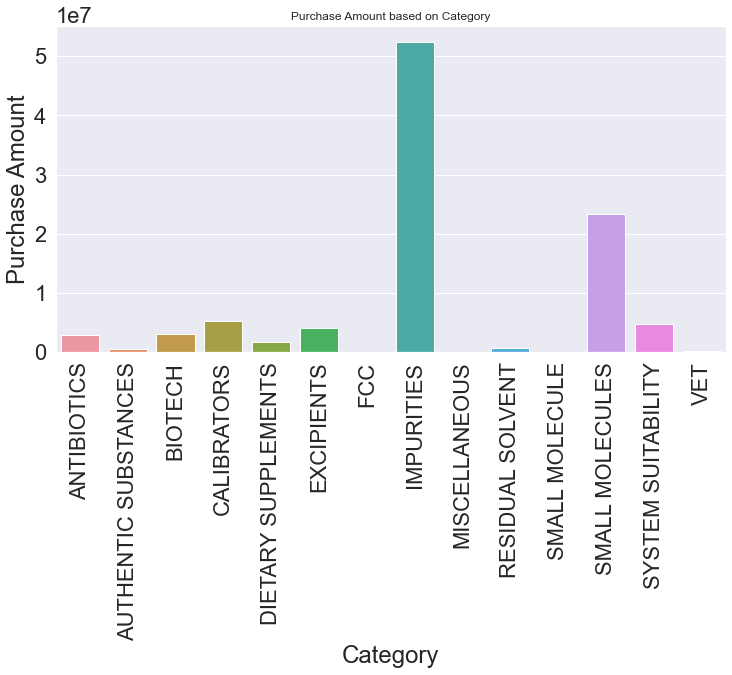

In [565]:
plt.figure(figsize=(12,6))
sns.barplot(x=selling.index, y='Purchase_Amount',data=selling)
sns.set(style='darkgrid')
plt.xticks(rotation=90)
plt.ylabel('Purchase Amount')
plt.title('Purchase Amount based on Category')

In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109293 entries, 2015-07-01 to 2018-03-30
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Discount       109293 non-null  float64
 1   Fiscal Month   109293 non-null  object 
 2   Fiscal Period  109293 non-null  object 
 3   Fiscal Year    109293 non-null  object 
 4   Category       109293 non-null  object 
 5   Item Name      109293 non-null  object 
 6   Customer       109293 non-null  object 
 7   Units          109293 non-null  int64  
 8   Revenue        109293 non-null  float64
 9   Quarter        109293 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 9.2+ MB


In [567]:
# Caculate Revenue over fiscal years
df[['Fiscal Year','Fiscal Period']]=df[['Fiscal Year','Fiscal Period']].astype(str)
df1 = df.groupby('Fiscal Year',as_index=False).agg({'Revenue':'sum'})
df1

,Fiscal Year,Revenue
0,2016.0,33170410
1,2017.0,37006887
2,2018.0,29005569


Text(0, 0.5, 'Revenue in ')

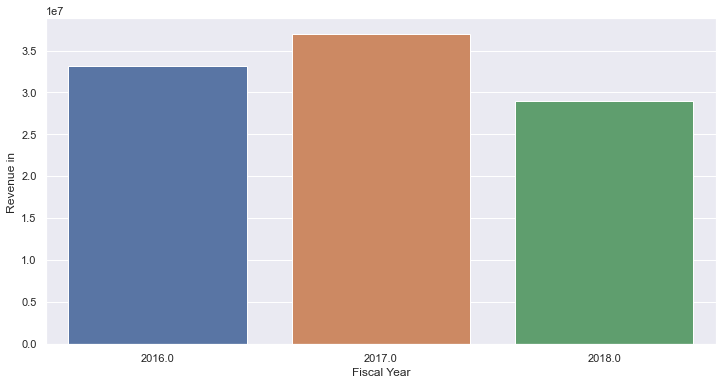

In [568]:
plt.figure(figsize=(12,6))
sns.barplot(x='Fiscal Year',y='Revenue',data=df1,ci=True)
plt.ylabel('Revenue in ')

In [569]:
df.set_index('Fiscal Date',inplace=True)

KeyError: "None of ['Fiscal Date'] are in the columns"

In [570]:
# Analyse The Revenue per Quarter:
df['Quarter'] = pd.PeriodIndex(df.index, freq='Q')
df['Quarter'].dtypes

period[Q-DEC]

In [571]:
df['Quarter'] = df['Quarter'].astype('str')
df.dtypes

Discount         float64
Fiscal Month      object
Fiscal Period     object
Fiscal Year       object
Category          object
Item Name         object
Customer          object
Units              int64
Revenue          float64
Quarter           object
dtype: object

In [572]:
df1=df.groupby('Quarter',as_index=False).Revenue.sum()
df1

,Quarter,Revenue
0,2015Q3,8234317
1,2015Q4,8513814
2,2016Q1,7528853
3,2016Q2,8893425
4,2016Q3,8250157
5,2016Q4,9745477
6,2017Q1,8500790
7,2017Q2,10510462
8,2017Q3,8740006
9,2017Q4,10363870


Text(0.5, 1.0, 'Revenue generated Over Quarters')

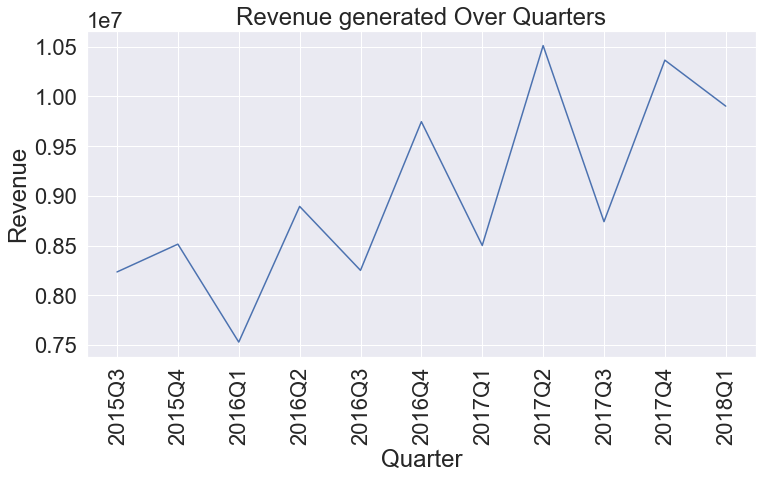

In [573]:
plt.figure(figsize=(12,6))
sns.set(font_scale=2)
sns.lineplot(x='Quarter',y='Revenue',data=df1)
plt.xticks(rotation=90)
plt.title("Revenue generated Over Quarters")

## As we can see the trend that every The Second and The Fourth Quarter , the revenue went down and went up again at first quarter of the next year

In [574]:
df2=df.groupby('Fiscal Month',as_index=False).Revenue.sum().sort_values('Revenue',ascending=False)
df2

,Fiscal Month,Revenue
2,DECEMBER,11209522
7,MARCH,9799724
9,NOVEMBER,8707006
10,OCTOBER,8706635
3,FEBRUARY,8561244
11,SEPTEMBER,8492564
1,AUGUST,8476890
5,JULY,8255026
4,JANUARY,7570368
6,JUNE,7126184


/Users/NDL/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/NDL/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/NDL/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


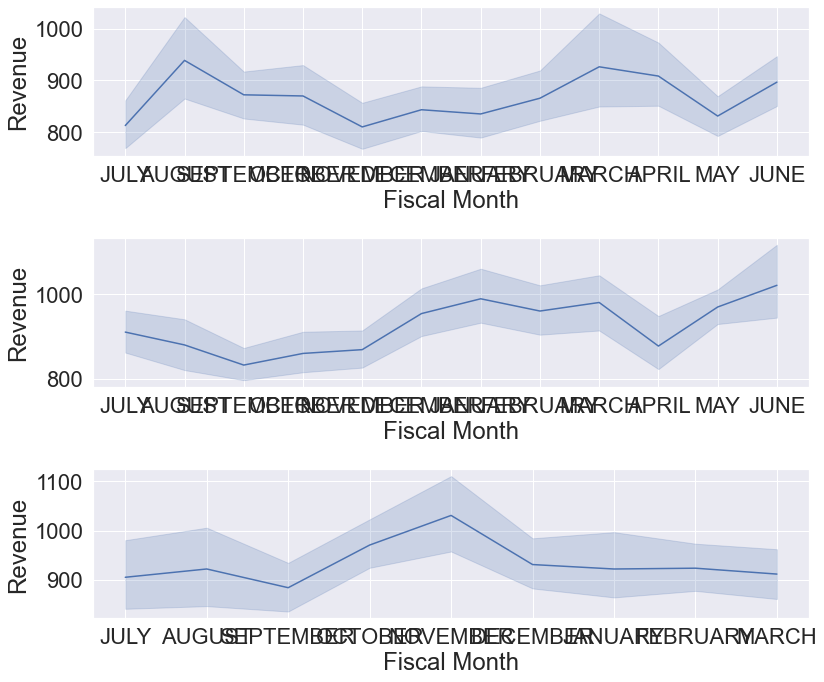

In [575]:
# Now let look at monthly revenue of each year :

fig, axes= plt.subplots(3,1,figsize=(12,10))

sns.lineplot('Fiscal Month','Revenue',data=df2016,ax=axes[0])

sns.lineplot('Fiscal Month','Revenue',data=df2017,ax=axes[1])
sns.lineplot('Fiscal Month','Revenue',data=df2018,ax=axes[2])
plt.tight_layout()

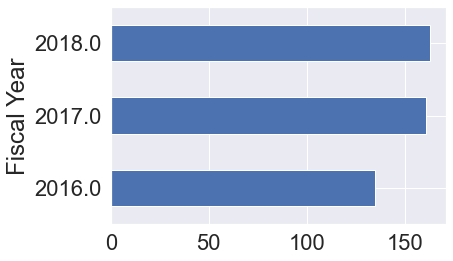

In [576]:
df.groupby('Fiscal Year')['Customer'].nunique().plot.barh()